In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv('Ames_Housing_Data_Outliers.csv')

In [53]:
df.shape

(2927, 82)

In [54]:
df.head()

,Unnamed: 0,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       2927 non-null   int64  
 1   PID              2927 non-null   int64  
 2   MS SubClass      2927 non-null   int64  
 3   MS Zoning        2927 non-null   object 
 4   Lot Frontage     2437 non-null   float64
 5   Lot Area         2927 non-null   int64  
 6   Street           2927 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2927 non-null   object 
 9   Land Contour     2927 non-null   object 
 10  Utilities        2927 non-null   object 
 11  Lot Config       2927 non-null   object 
 12  Land Slope       2927 non-null   object 
 13  Neighborhood     2927 non-null   object 
 14  Condition 1      2927 non-null   object 
 15  Condition 2      2927 non-null   object 
 16  Bldg Type        2927 non-null   object 
 17  House Style   

In [56]:
df = df.drop('PID',axis=1)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       2927 non-null   int64  
 1   MS SubClass      2927 non-null   int64  
 2   MS Zoning        2927 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2927 non-null   int64  
 5   Street           2927 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2927 non-null   object 
 8   Land Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot Config       2927 non-null   object 
 11  Land Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition 1      2927 non-null   object 
 14  Condition 2      2927 non-null   object 
 15  Bldg Type        2927 non-null   object 
 16  House Style      2927 non-null   object 
 17  Overall Qual  

In [58]:
df.isnull().sum()

Unnamed: 0          0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 81, dtype: int64

In [59]:
def percent_missing(df):
    percent_nan = 100 * df.isnull().sum()/len(df)
    percent_nan = percent_nan[percent_nan > 0 ].sort_values()
    return percent_nan

In [60]:
pn = percent_missing(df)

In [61]:
pn

Electrical         0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 1       0.034165
BsmtFin SF 2       0.034165
Garage Cars        0.034165
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

(0.0, 1.0)

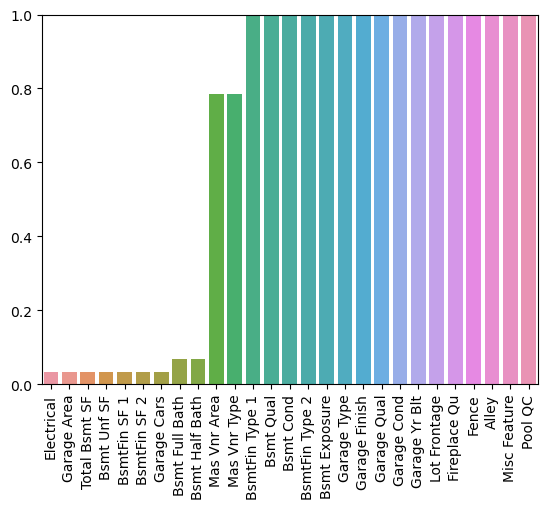

In [62]:

sns.barplot(x=pn.index,y=pn)
plt.xticks(rotation=90)
plt.ylim(0,1)

In [63]:
pn[pn < 1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

In [64]:
df = df.dropna(axis=0,subset=['Electrical','Garage Cars'])

In [65]:
pn = percent_missing(df)

In [66]:
pn[pn < 1]

Bsmt Unf SF       0.034188
Total Bsmt SF     0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Bsmt Full Bath    0.068376
Bsmt Half Bath    0.068376
Mas Vnr Type      0.786325
Mas Vnr Area      0.786325
dtype: float64

(0.0, 1.0)

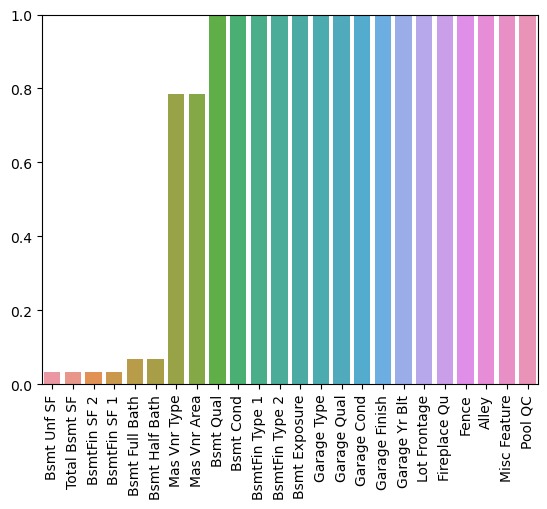

In [67]:

sns.barplot(x=pn.index,y=pn)
plt.xticks(rotation=90)
plt.ylim(0,1)

In [68]:
df[df['Bsmt Full Bath'].isnull()]

,Unnamed: 0,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [69]:
df[df['Bsmt Half Bath'].isnull()]

,Unnamed: 0,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [70]:
# basement numeric colums as 0
bsmt_numeric_cols = ['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath']
df[bsmt_numeric_cols] = df[bsmt_numeric_cols].fillna(0)
# basement string columns as string None
bsmt_string_cols = ['Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2']
df[bsmt_string_cols] = df[bsmt_string_cols].fillna('None')

In [71]:
pn = percent_missing(df)

In [72]:
pn[pn < 1]

Mas Vnr Type    0.786325
Mas Vnr Area    0.786325
dtype: float64

(0.0, 1.0)

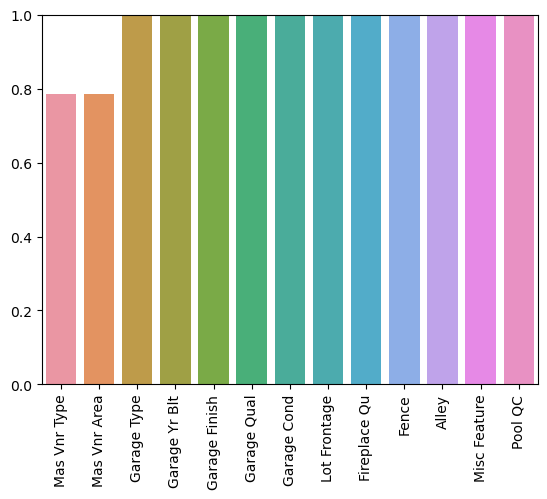

In [73]:
sns.barplot(x=pn.index,y=pn)
plt.xticks(rotation=90)
plt.ylim(0,1)

In [74]:
df[df['Mas Vnr Type'].isnull()]

,Unnamed: 0,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
55,55,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
484,484,60,RL,NaN,12891,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,257500
517,517,20,FV,90.0,7993,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,New,Partial,225000
538,538,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
867,867,60,RL,70.0,8749,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2009,WD,Normal,198500
1095,1095,60,RL,NaN,7750,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,176000
1119,1119,20,RL,87.0,10037,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,247000
1122,1122,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
1127,1127,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
1184,1184,60,FV,NaN,7500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,205000


In [37]:
df[df['Mas Vnr Area'].isnull()]

,Unnamed: 0,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
55,55,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
484,484,60,RL,NaN,12891,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,257500
517,517,20,FV,90.0,7993,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,New,Partial,225000
538,538,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
867,867,60,RL,70.0,8749,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2009,WD,Normal,198500
1095,1095,60,RL,NaN,7750,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,176000
1119,1119,20,RL,87.0,10037,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,247000
1122,1122,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
1127,1127,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
1184,1184,60,FV,NaN,7500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,205000


In [75]:
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

In [76]:
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna(0)

In [77]:
pn = percent_missing(df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Garage Type'),
  Text(1, 0, 'Garage Yr Blt'),
  Text(2, 0, 'Garage Finish'),
  Text(3, 0, 'Garage Qual'),
  Text(4, 0, 'Garage Cond'),
  Text(5, 0, 'Lot Frontage'),
  Text(6, 0, 'Fireplace Qu'),
  Text(7, 0, 'Fence'),
  Text(8, 0, 'Alley'),
  Text(9, 0, 'Misc Feature'),
  Text(10, 0, 'Pool QC')])

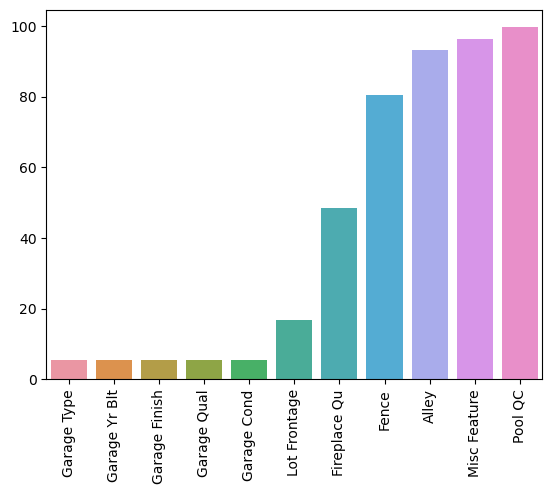

In [78]:
sns.barplot(x=pn.index,y=pn)
plt.xticks(rotation=90)

In [50]:
df[df['Garage Type'].isnull() | df['Garage Yr Blt'].isnull() 
   | df['Garage Finish'].isnull()| df['Garage Qual'].isnull() 
  | df['Garage Cond'].isnull()]

,Unnamed: 0,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
27,27,20,RL,70.0,10500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,ConLI,Normal,115000
119,119,20,RL,77.0,9320,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,400,1,2010,WD,Normal,128950
125,125,90,RL,98.0,13260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2010,Oth,Abnorml,84900
129,129,20,RL,50.0,7207,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,116500
130,130,30,RL,55.0,5350,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,Shed,450,5,2010,WD,Normal,76500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2910,2913,180,RM,21.0,1470,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,73000
2913,2916,180,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Abnorml,92000
2915,2918,160,RM,21.0,1526,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,79500
2916,2919,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,90500


In [82]:
garage_string_cols = ['Garage Type','Garage Finish','Garage Qual','Garage Cond']
df[garage_string_cols] = df[garage_string_cols].fillna('None')
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [83]:
pn = percent_missing(df)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Lot Frontage'),
  Text(1, 0, 'Fireplace Qu'),
  Text(2, 0, 'Fence'),
  Text(3, 0, 'Alley'),
  Text(4, 0, 'Misc Feature'),
  Text(5, 0, 'Pool QC')])

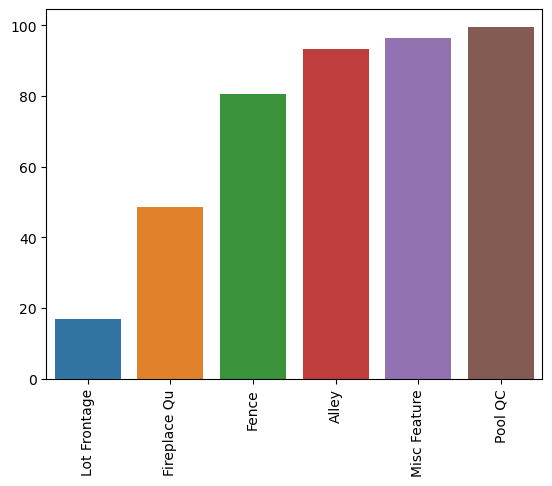

In [84]:
sns.barplot(x=pn.index,y=pn)
plt.xticks(rotation=90)

In [85]:
df = df.drop(['Fence','Alley','Misc Feature','Pool QC'],axis=1)

(array([0, 1]), [Text(0, 0, 'Lot Frontage'), Text(1, 0, 'Fireplace Qu')])

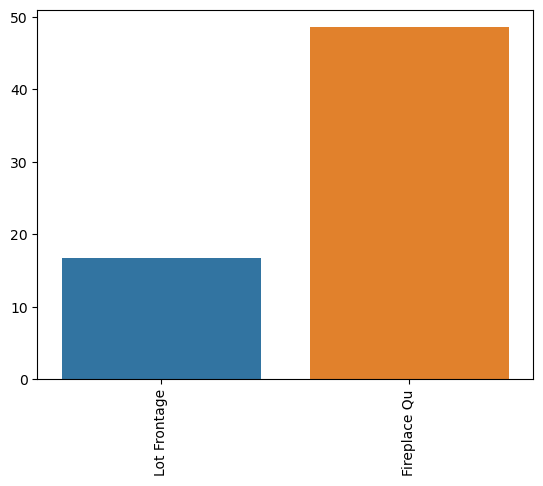

In [86]:
pn = percent_missing(df)
sns.barplot(x=pn.index,y=pn)
plt.xticks(rotation=90)

In [88]:
df['Fireplace Qu'].value_counts()

Gd    741
TA    600
Fa     75
Po     46
Ex     43
Name: Fireplace Qu, dtype: int64

In [89]:
df['Fireplace Qu'] =df['Fireplace Qu'].fillna('None')

(array([0]), [Text(0, 0, 'Lot Frontage')])

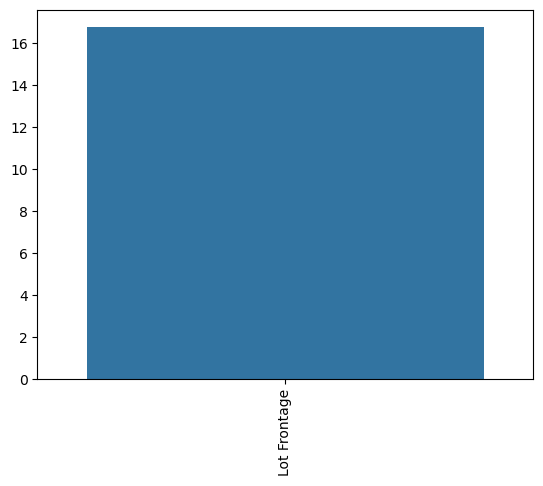

In [90]:
pn = percent_missing(df)
sns.barplot(x=pn.index,y=pn)
plt.xticks(rotation=90)

In [91]:
df['Lot Frontage'].mean()

69.0817248459959

<AxesSubplot:xlabel='Lot Frontage', ylabel='Neighborhood'>

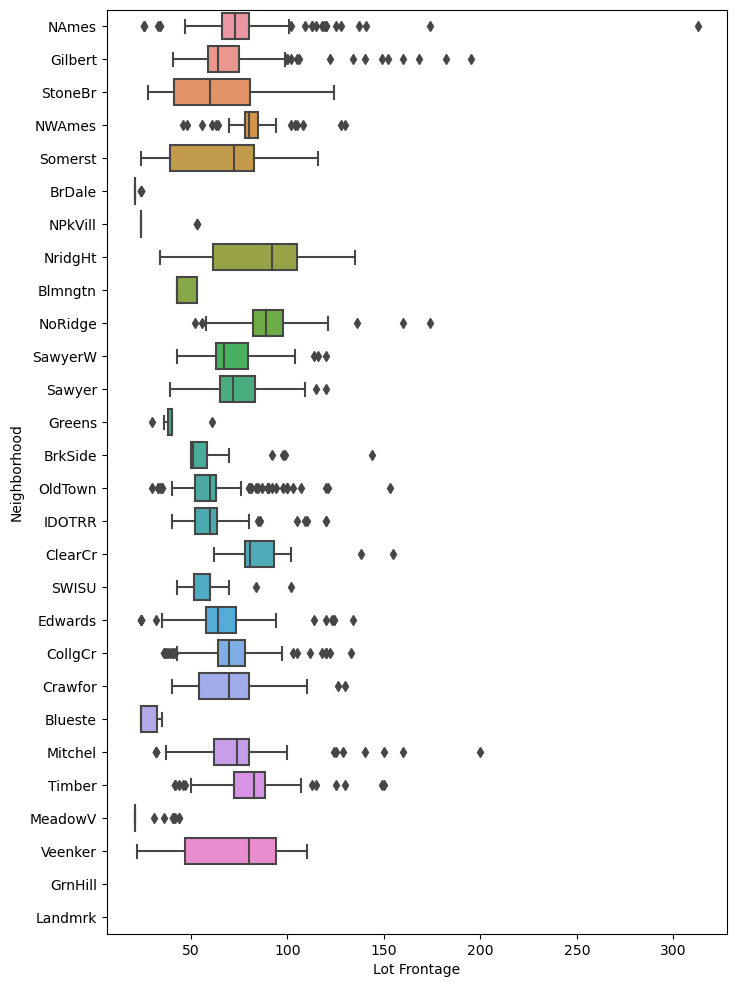

In [94]:
plt.figure(figsize=(8,12))
sns.boxplot(x='Lot Frontage',y='Neighborhood',data=df,orient='h')

In [96]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [98]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda x : x.fillna(x.mean()) )

(array([0]), [Text(0, 0, 'Lot Frontage')])

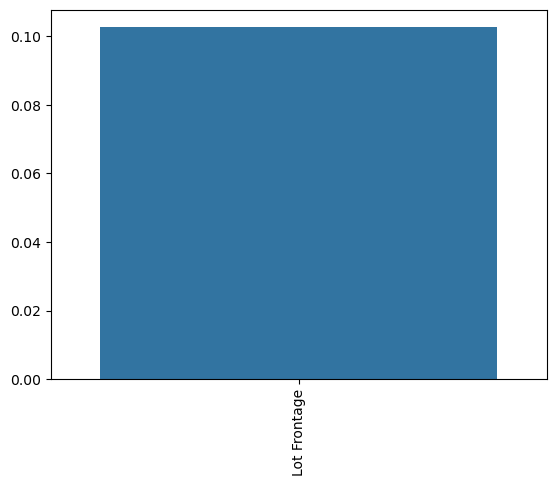

In [99]:
pn = percent_missing(df)
sns.barplot(x=pn.index,y=pn)
plt.xticks(rotation=90)

In [100]:
df['Lot Frontage'].isnull().sum()

3

In [101]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [102]:
df['Lot Frontage'].isnull().sum()

0

In [103]:
df.to_csv('Ames_Housing_Data_Missing_Fixed.csv')